# Load Best Model

In [1]:
from dataset import VOCDetectionCustom, show_image, show_tensors_data
from model import TinyYOLO, YoloV3Loss
from train import Trainer, load_checkpoint
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import torchvision.transforms as T
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader

In [2]:
cls_test = ['bicycle', 'bus', 'car', 'motorbike']
dataset = VOCDetectionCustom(classes=cls_test)
train_len = int(0.8 * len(dataset))
test_len = len(dataset) - train_len
train_ds, test_ds = torch.utils.data.random_split(dataset, [train_len,
                                                            test_len])
train_dl = DataLoader(train_ds,
                      batch_size=32,
                      shuffle=True)

test_dl = DataLoader(test_ds,
                     batch_size=32,
                     shuffle=True)

In [3]:
model = TinyYOLO()
criterion = YoloV3Loss()
optimizer = optim.Adam(model.parameters())
scheduler = ReduceLROnPlateau(optimizer,
                              'min')

In [4]:
loaded_results = load_checkpoint('models/Epoch_97better_2019-07-24_12-25-55.model', model, optimizer, scheduler, 'cuda')
model = loaded_results['model'].cuda()

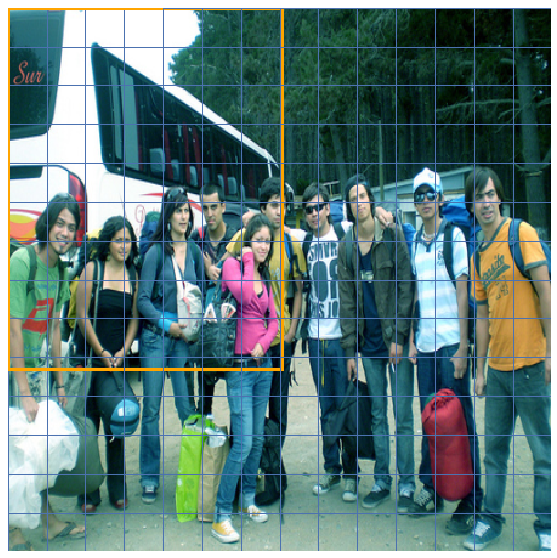

In [5]:
img, target = next(test_dl.__iter__())
show_tensors_data(img[0], target[0])

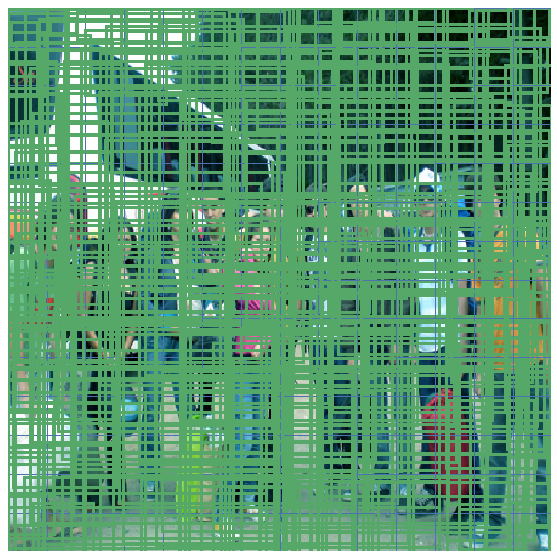

In [6]:
pred = model(img[0:1].cuda())
show_tensors_data(img[0], pred[0])

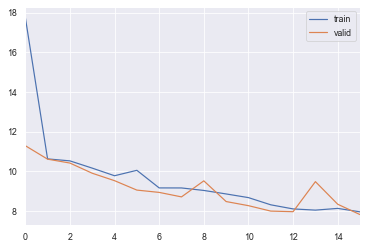

In [11]:
pd.DataFrame(loaded_results['losses']).plot()

In [20]:
loaded2 = load_checkpoint('models/Epoch_16better_2019-07-24_00-24-08.model', model, optimizer, scheduler, 'cuda')
#loaded2 = load_checkpoint('models/Epoch_700worse_2019-07-24_05-06-47.model', model, optimizer, scheduler, 'cuda')
df = pd.DataFrame(loaded2['losses'])

In [21]:
df.train.iloc[-1]

7.957540149111941